## Introduction to Neural Networks

### Exercise: neurons as logic gates
---
In this exercise we will experiment with neuron computations.  We will show how to represent basic logic functions like AND, OR, and XOR using single neurons (or more complicated structures).  Finally, at the end we will walk through how to represent neural networks as a string of matrix computations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Sigmoid function

$$ \sigma = \frac{1}{1 + e^{-x}} $$

$\sigma$ ranges from $(0, 1)$. When the input $x$ is negative, $\sigma$ is closer to 0. When $x$ is positive, $\sigma$ is closer to 1. At $x=0$, $\sigma=0.5$

In [3]:
# define the sigmoid function

### code start
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))
### code end

sigmoid(np.array([-10^4, -10^2, 0, 10^1, 10^3]))

array([8.31528028e-07, 6.14417460e-06, 5.00000000e-01, 9.99983299e-01,
       9.99876605e-01])

Expected output:
```
array([8.31528028e-07, 6.14417460e-06, 5.00000000e-01, 9.99983299e-01,
       9.99876605e-01])
```

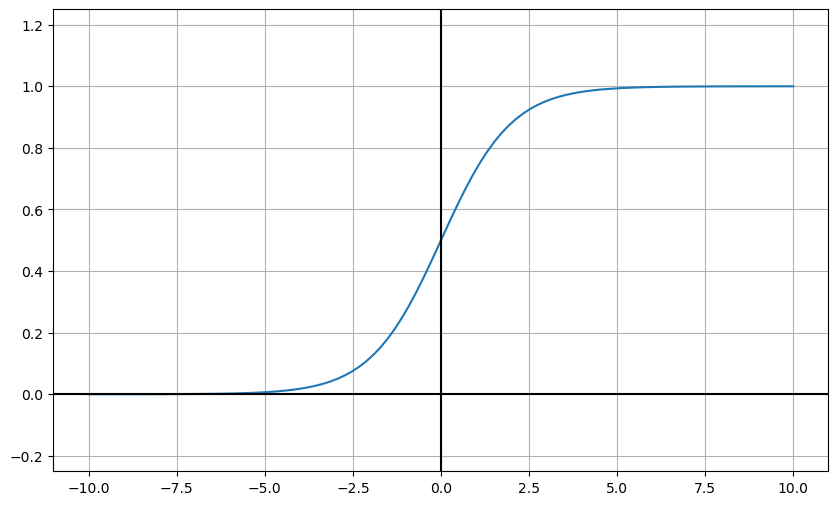

In [4]:
# Plot the sigmoid function
vals = np.linspace(-10, 10, num=100, dtype=np.float32)

fig = plt.figure(figsize=(10,6))
### code start
plt.plot(vals, sigmoid(vals), )
plt.ylim([-0.25, 1.25])
### code end
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks();

Expected output:
<img src='../images/sigmoid.png' width='40%' />

### Thinking of neurons as boolean logic gates
---
A logic gate takes in two boolean inputs `1` (`true`) or `0` (`false`), and returns either a 0 or 1 depending on its rule. The truth table for a logic gate shows the outputs for each combination of inputs, `(0, 0)`, `(0, 1)`, `(1,0)`, and `(1, 1)`. For example, let's look at the truth table for an "OR" gate:


#### OR gate truth table

Input | Output
--- | ---
0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 1

A neuron that uses the sigmoid activation function outputs a value between (0, 1). This naturally leads us to think about boolean values. Imagine a neuron that takes in two inputs, $x_1$ and $x_2$, and a bias term:

<img src='../images/logic01.png' width='50%'/>

By limiting the inputs of $x_1$ and $x_2$ to be in $\left\{0, 1\right\}$, we can simulate the effect of logic gates with our neuron. The goal is to find the weights (represented by the ?-marks above), such that it returns an output close to 0 or 1 depending on the inputs.

What numbers for the weights would we need to fill in for this gate to output OR logic? Remember: $\sigma(z)$ is close to 0 when $z$ is largely negative (around -10 or less), and is close to 1 when $z$ is largely positive (around +10 or greater).

$$
z = w_1 x_1 + w_2 x_2 + 1 b
$$

Let's think this through:

* When $x_1$ and $x_2$ are both 0, the only value affecting $z$ is $b$. Because we want the result for (0, 0) to be close to zero, $b$ should be negative (at least -10)
* If either $x_1$ or $x_2$ is 1, we want the output to be close to 1. That means the weights associated with $x_1$ and $x_2$ should be enough to offset $b$ to the point of causing $z$ to be at least 10.
* Let's give $b$ a value of -10. How big do we need $w_1$ and $w_2$ to be? 
    * At least +20
* So let's try out $w_1=20$, $w_2=20$, and $b=-10$!

<img src='../images/logic02.png' width='50%'/>

In [ ]:
# Helper to create logic gate functions

def logic_gate(w1, w2, b):  # weight_x1, weight_x2, and bias
    return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

# Helper function to test out our weight functions.
def test(gate):
    for x1, x2 in (0, 0), (0, 1), (1, 0), (1, 1):
        print(f"{x1}, {x2}: {np.round(gate(x1 , x2))}")

In [ ]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

Expected output:
```
0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0
```

Now you try finding the appropriate weight values for each truth table. Try not to guess and check - think through it logically and try to derive values that work.

#### AND gate truth table

Input | Output
--- | ---
0 0 | 0
0 1 | 0
1 0 | 0
1 1 | 1

### Exercise
---
Try to figure out what values for the neurons would make this function as an AND gate.

In [ ]:
### code start
and_gate = logic_gate(15, 15, -20)
### code end

test(and_gate)

Expected output:
```
0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0
```

### Exercise
---
Do the same for the NOR gate and the NAND gate.

#### NOR (Not Or) Gate

Input | Output
--- | ---
0 0 | 1
0 1 | 0
1 0 | 0
1 1 | 0

In [ ]:
### code start
nor_gate = logic_gate(-20, -20, 10)
### code end

test(nor_gate)

Expected output:
```
0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0
```
### NAND (Not And) Gate

Input | Output
--- | ---
0 0 | 1
0 1 | 1
1 0 | 1
1 1 | 0

In [ ]:
### code start
nand_gate = logic_gate(-15, -15, 20)
### code end
test(nand_gate)

Expected output:
```
0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0
```
## The limits of single neurons

You may know from Analysis courses (logic) that the XOR gates are the basis of computation. They can be used as so-called "half-adders", the foundation of being able to add numbers together. Here's the truth table for XOR:

### XOR (Exclusive Or) Gate

Input | Output
--- | ---
0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 0

Can you create a set of weights such that a single neuron can output this property? It turns out that you cannot. Single neurons can't correlate inputs, so it's just confused. So individual neurons are out. Can we still use neurons to somehow form an XOR gate?

What if we apply a bit more complex: rewrite the XOR using the gates we have (OR, AND, NAND, NOR).

1. ```(not a and b) or (a and not b)``` $(\lnot a \land b) \lor (a \land \lnot b)$

 or a somewhat simplified version

2. ```(a or b) and not (a and b)``` $(a \lor b) \land \lnot (a \land b)$

Build both version of the XOR-gate using the gates we have.

*HINT: you do not have a NOT-gate but you can build them using one of the gates you do have.*


In [ ]:
### code start
def xor_gate_1(a, b):
    return or_gate(and_gate(nand_gate(a,a), b), and_gate(a, nand_gate(b,b)))
### code end
           
test(xor_gate_1)

In [ ]:
### code start
def xor_gate_2(a, b):
    return and_gate(or_gate(a, b), nand_gate(a, b))
### code end

test(xor_gate_2)

<img src='images/logic03.png' width='30%'/>

This image represents the second one. The inputs go to two separate gates: the top neuron is an OR gate, and the bottom is a NAND gate. The output of these gates get passed to an AND gate. 

Expected output:
```
0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0
```

### Feedforward Networks as Matrix Computations
---
We discussed previously how the feed-forward computation of a neural network can be thought of as matrix calculations and activation functions. We will do some actual computations with matrices to see this in action.

<img src='images/FF_NN.png' width='50%'/>

### Exercise
---
Provided below are the following:

- Three weight matrices `W_1`, `W_2` and `W_3` representing the weights in each layer.  The convention for these matrices is that each $W_{i,j}$ gives the weight from neuron $i$ in the previous (left) layer to neuron $j$ in the next (right) layer.  
- A vector `x_in` representing a single input and a matrix `x_mat_in` representing 7 different inputs.
- Two functions: `soft_max_vec` and `soft_max_mat` which apply the soft_max function to a single vector, and row-wise to a matrix.

The goals for this exercise are:

1. For input `x_in` calculate the inputs and outputs to each layer (assuming sigmoid activations for the middle two layers and soft_max output for the final layer.
2. Write a function that does the entire neural network calculation for a single input
3. Write a function that does the entire neural network calculation for a matrix of inputs, where each row is a single input.
4. Test your functions on `x_in` and `x_mat_in`.

In [ ]:
W_1 = np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_2 = np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3 = np.array([[-1,3,-2],[1,-1,-3],[3,-2,2],[1,2,1]])

W_1

In [ ]:
### code start
x_in = np.array([.5,.8,.2])
### code end

x_in

Expected output:
```
array([0.5, 0.8, 0.2])
```

In [ ]:
### code start
x_mat_in = np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],[.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])
### code end

x_mat_in

Expected output:
```
array([[0.5, 0.8, 0.2],
       [0.1, 0.9, 0.6],
       [0.2, 0.2, 0.3],
       [0.6, 0.1, 0.9],
       [0.5, 0.5, 0.4],
       [0.9, 0.1, 0.9],
       [0.1, 0.8, 0.7]])
```

In [ ]:
def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))

## Student to do the calculations below

In [ ]:
# Vector

### code start
def vector_input(i,w1,w2,w3):
    layer1 = sigmoid(np.dot(i,w1))
    layer2 = sigmoid(np.dot(layer1,w2))
    output = soft_max_vec(np.dot(layer2,w3))
    return output
### code end

print(vector_input(x_in, W_1, W_2, W_3))

Expected output:
```
[0.72780576 0.26927918 0.00291506]
```

In [ ]:
#multiple input
def matrix_input(i,w1,w2,w3):
    layer1 = sigmoid(np.dot(i,w1))
    layer2 = sigmoid(np.dot(layer1,w2))
    output = soft_max_mat(np.dot(layer2,w3))
    return output

print(matrix_input(x_mat_in,W_1,W_2,W_3))

Expected output:
```
[[0.72780576 0.26927918 0.00291506]
 [0.62054212 0.37682531 0.00263257]
 [0.69267581 0.30361576 0.00370844]
 [0.36618794 0.63016955 0.00364252]
 [0.57199769 0.4251982  0.00280411]
 [0.38373781 0.61163804 0.00462415]
 [0.52510443 0.4725011  0.00239447]]
```